## feature importance analysis

In [34]:
import sys
sys.path.append("../") # go to parent dir
from xifaims import processing as xp
from xifaims import plots as xpl
from xifaims import ml
import shap
import matplotlib.pyplot as plt
import pickle
import os

def load_for_shap(path="", prefix=""):
    shap_data = pickle.load(open(os.path.join(path, f"{prefix}_shap_data.p"), "rb"))
    return shap_data["TT"], shap_data["TT_feat"], shap_data["DX"], shap_data["DX_features"], \
           shap_data["clf"]


In [35]:
path = "shap"
df_TT, df_TT_features, df_DX, df_DX_features, classifier = load_for_shap("../shap/", "xgbr_structure_")
# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
X_train, y_train, X_val, y_val = ml.preprocess_train_test(df_TT, df_TT_features, scale=True)

In [36]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_val)
ishap_values = shap.TreeExplainer(classifier).shap_interaction_values(X_val)

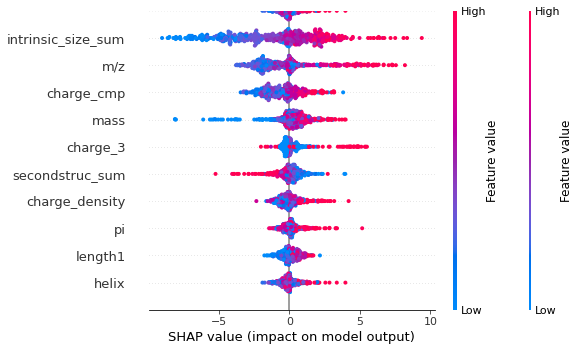

In [59]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_val.iloc[0,:])


fig = shap.summary_plot(shap_values, X_val, show=False)
plt.savefig("force_plot.png")
plt.savefig("force_plot.svg")
#shap.summary_plot(shap_values, X_val, plot_type="violin")
#shap.summary_plot(shap_values, X_val, plot_type="bar")



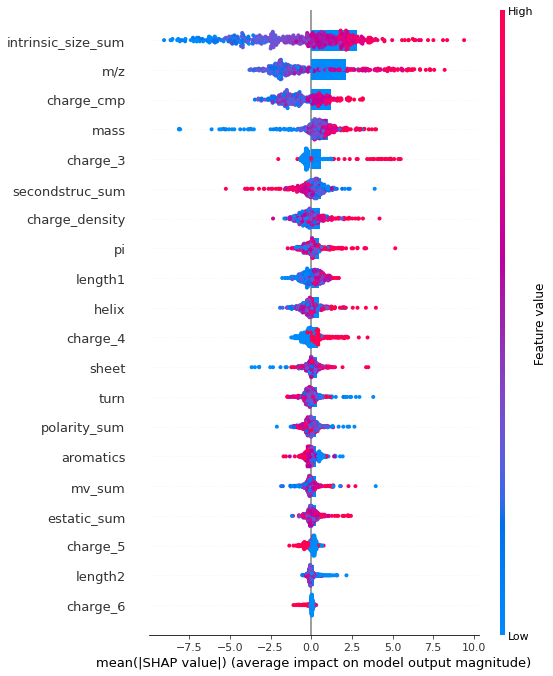

In [68]:
fig = shap.summary_plot(shap_values, X_val, show=False, max_display=20)
plt.tight_layout()
plt.savefig("force_plot_10.png")
plt.savefig("force_plot_10.svg")



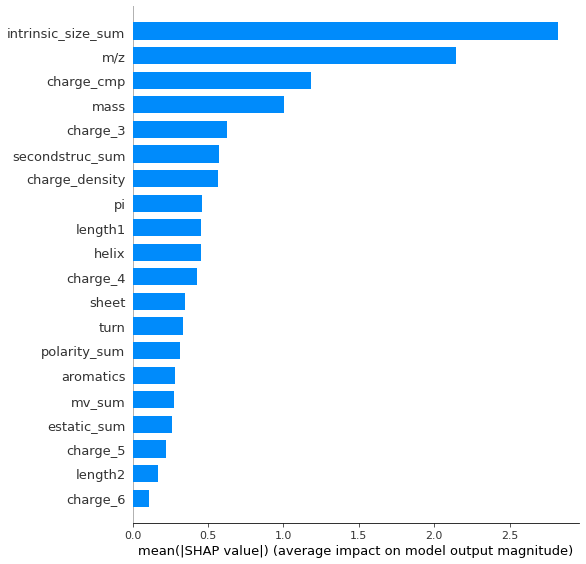

In [69]:
fig = shap.summary_plot(shap_values, X_val, show=False, max_display=20, plot_type="bar")
plt.savefig("force_plot_10_bar.png")
plt.savefig("force_plot_10_bar.svg")

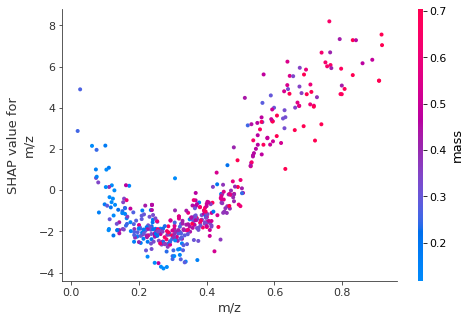

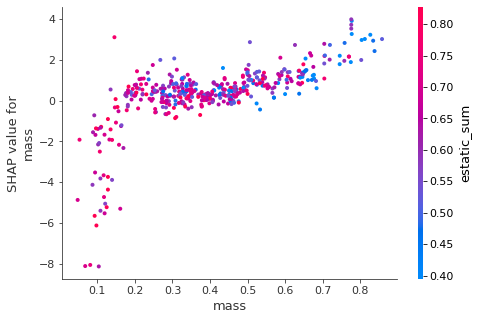

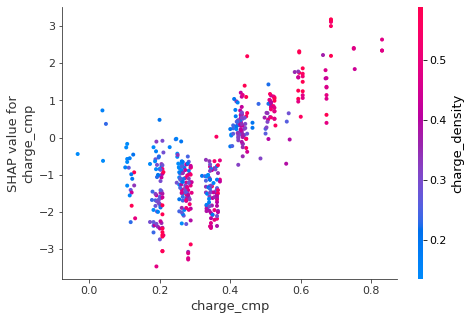

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


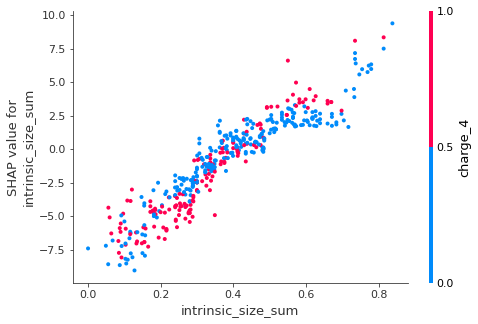

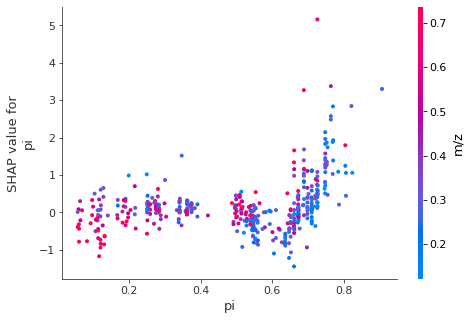

In [49]:
shap.dependence_plot("m/z", shap_values, X_val)
shap.dependence_plot("mass", shap_values, X_val)

shap.dependence_plot("intrinsic_size_sum", shap_values, X_val)
shap.dependence_plot("pi", shap_values, X_val)






Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


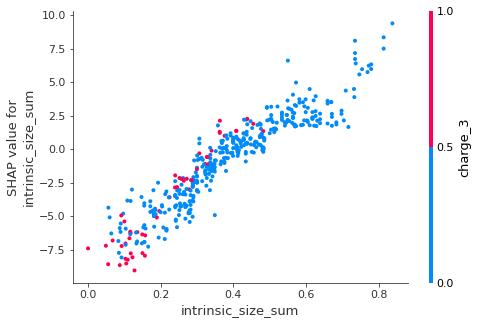

In [100]:
shap.dependence_plot("intrinsic_size_sum", shap_values, X_val, interaction_index="charge_3")

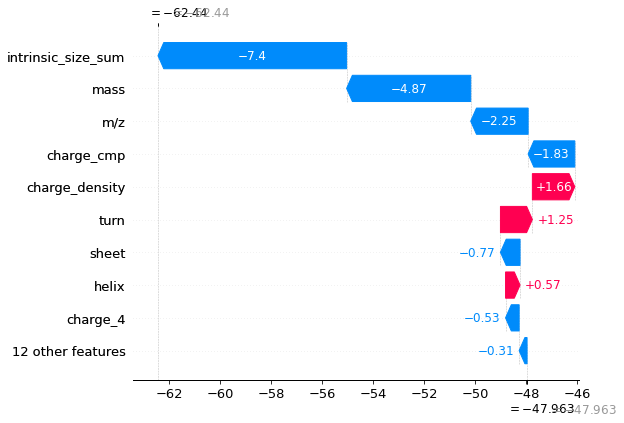

QCceKGDPK-TKbs3ohCceAR-3


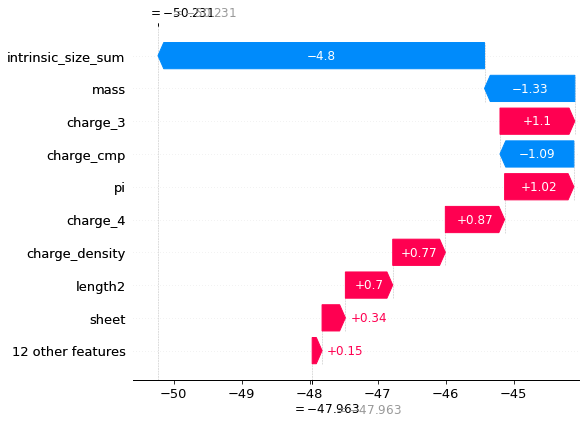

FKDLGEEHFK-SEIAHR-4


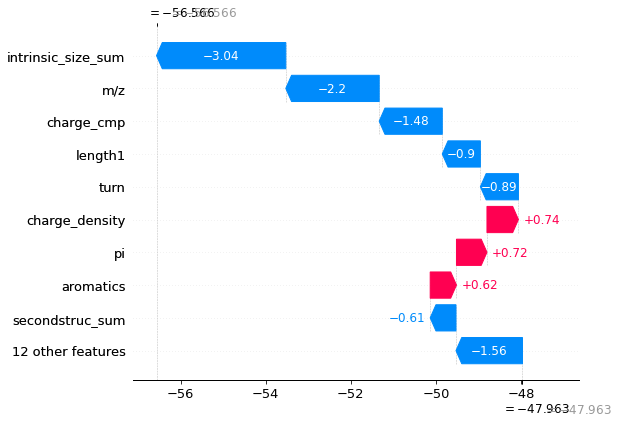

GGVHVKLAHLSK-VISMoxEKGGNMoxK-5


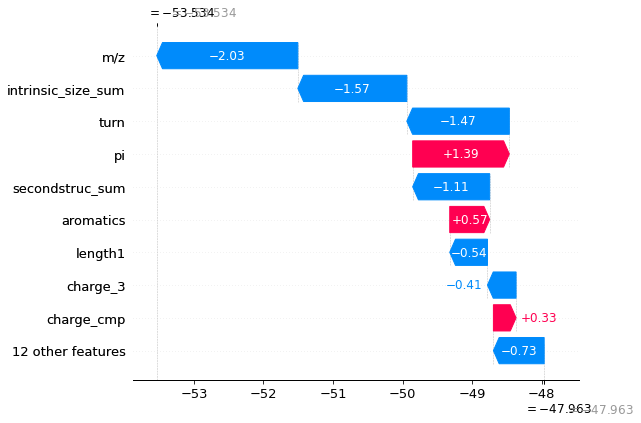

VISMEKGGNMK-GGVHVKLAHLSKHPK-5


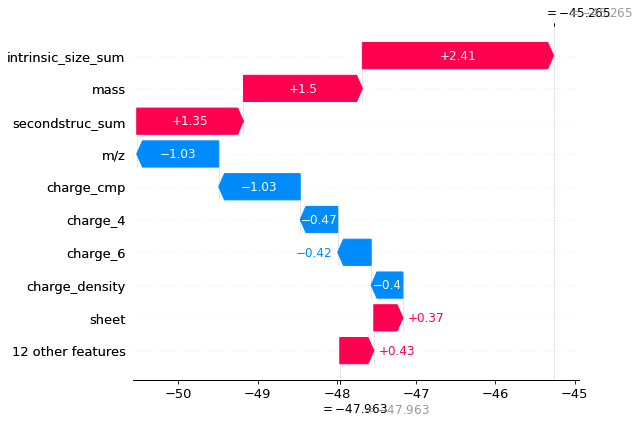

TEAEMoxKASEDLK-YLEFISDAIIHVLHSKHPGDFGADAQGAMoxTK-6


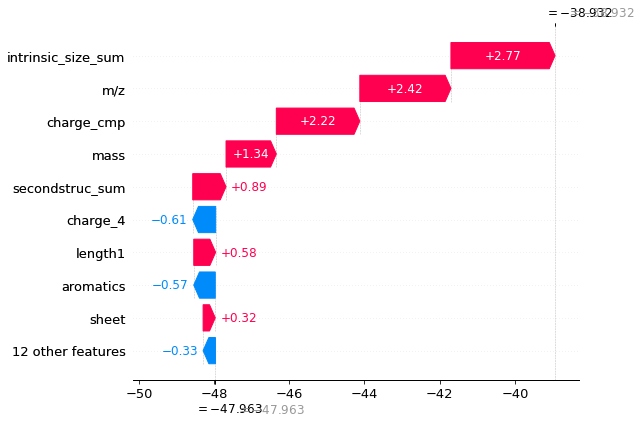

HKIPIKYLEFISDAIIHVLHSK-LFTGHPETLEKFDKbs3nh2FK-5


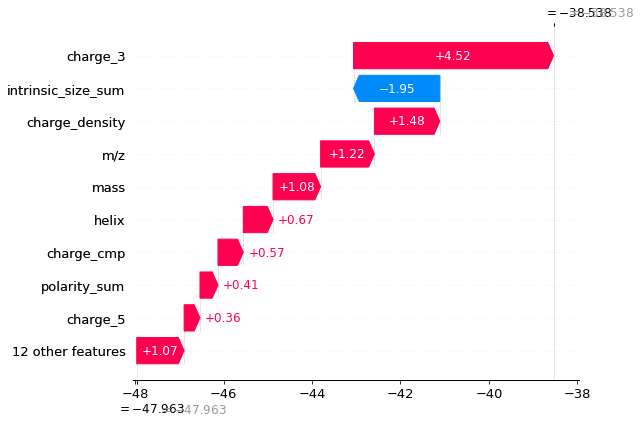

GGVHVKLAHLSK-HPKFEEILTR-3


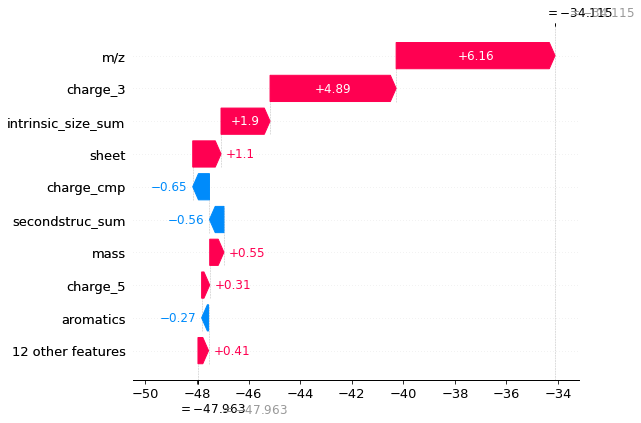

LNYKSEEEYPDLSK-RAVEKLSVEALNSLTGEFK-3


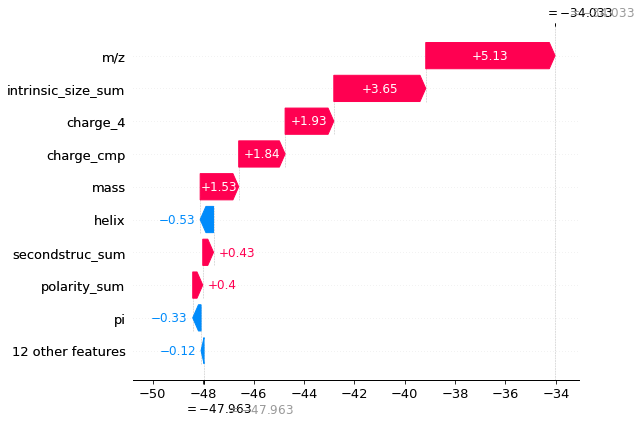

GHHEAELKPLAQSHATKHK-IPIKYLEFISDAIIHVLHSK-4


In [95]:
df_TT["Z"] = [str(i) for i in df_TT["Charge"]]
for i in range(1, 10):
    shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[i,:], feature_names=X_val.columns.values, max_display=10, show=True)
    print("-".join(df_TT.loc[X_val.index[i]][["PepSeq1", "PepSeq2", "Z"]].values))

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


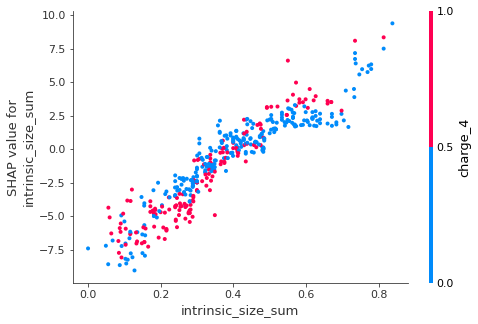

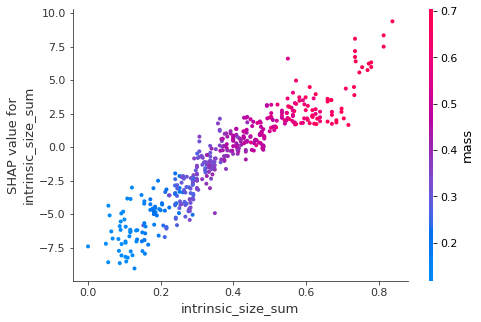

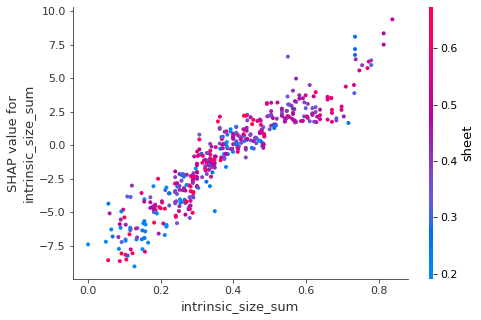

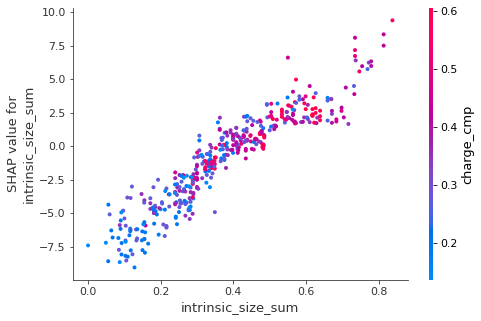

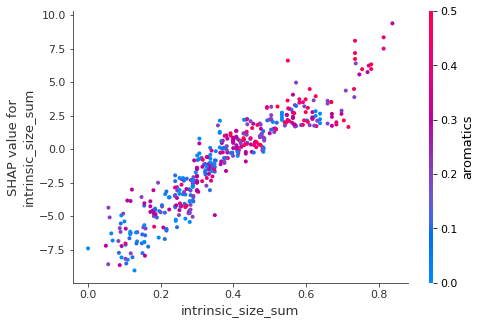

In [54]:
inds = shap.approximate_interactions("intrinsic_size_sum", shap_values, X_val)
for i in range(5):
    shap.dependence_plot("intrinsic_size_sum", shap_values, X_val, interaction_index=inds[i])

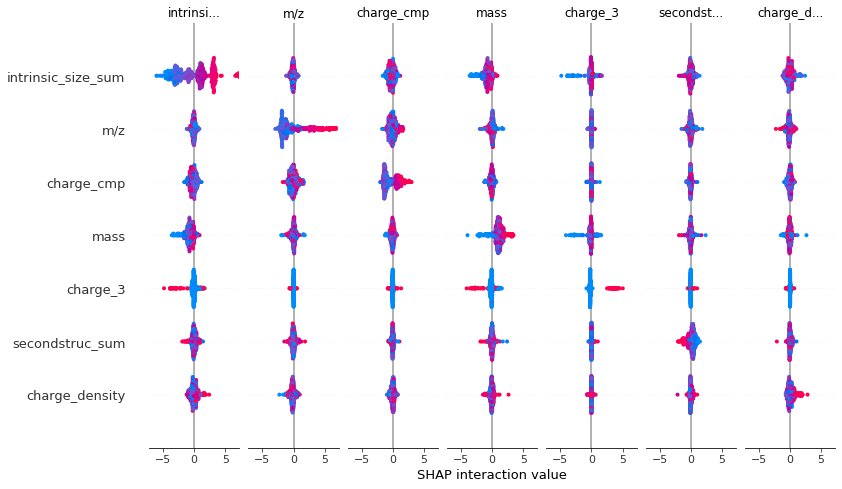

In [45]:
shap.summary_plot(ishap_values, X_val)

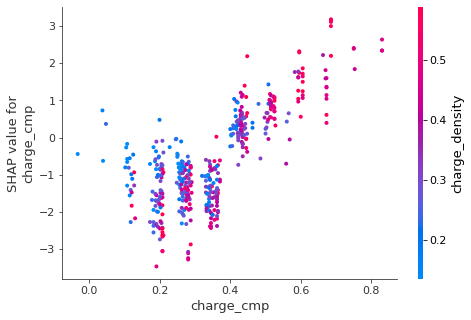

In [57]:
shap.dependence_plot("charge_cmp", shap_values, X_val, show=False)
plt.savefig("charge_cmp_dependance.png", dpi=300)
plt.savefig("charge_cmp_dependance.svg")